In [195]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import SearchIO
import csv
import sqlite3
import time
from multiprocessing import Pool, cpu_count
import sys
from calc_icity_ import *
import ast
from collections import defaultdict
import subprocess
import logomaker

In [253]:
def get_prot_sequence(pid):
    con = sqlite3.connect("80kprotein_stats.db")
    cur = con.cursor()
    cmd = "SELECT sequence FROM proteins WHERE pid = '%s'" % pid 
    #print(cmd)
    cur.execute(cmd)
    return str(cur.fetchone()[0])
    con.close()
def get_p100s(p90_id):
    conn = sqlite3.connect('genegraph.db')
    cursor = conn.cursor()
    cmd = "SELECT p100 FROM clusters WHERE p90 = '%s'" % (p90_id)
    cursor.execute(cmd)
    p100s = get_list_ids_fromcursor(cursor.fetchall())
    conn.close()
    return(list(set(p100s)))
def get_p100s_p30(p30_id):
    conn = sqlite3.connect('genegraph.db')
    cursor = conn.cursor()
    cmd = "SELECT p100 FROM clusters WHERE p90 = '%s'" % (p30_id)
    cursor.execute(cmd)
    p100s = get_list_ids_fromcursor(cursor.fetchall())
    conn.close()
    return(list(set(p100s)))
def get_permissive_rep_(bait_pid):
    conn = sqlite3.connect('genegraph.db')
    cursor = conn.cursor()
    perm_rep = None
    cmd_p = "SELECT p30 FROM clusters WHERE p100 = '%s'" % (bait_pid)
    try:
        cursor.execute(cmd_p)
        perm_rep = cursor.fetchone()[0]
        conn.close()
        return(perm_rep)
    except:
        return "nan"
def get_stringent_rep(p100_id):
    conn = sqlite3.connect('genegraph.db')
    cursor = conn.cursor()
    perm_rep = None
    cmd_p = "SELECT p90 FROM clusters WHERE p100 = '%s'" % (p100_id)
    cursor.execute(cmd_p)
    try:
        perm_rep = cursor.fetchone()[0]
    except:
        pass
    #perm_rep = cursor.fetchone()[0]
    conn.close()
    return(perm_rep)

In [265]:
get_prot_sequence('08d8b0aae431e781e7')

'MGKSTIKLTRRIQLLIDLPTKEERKEKLDKLYQYQNRCFRAANIMVSHMYVQEMIKEFFYLSEGIKYKLADEKKEEDGILQRSRINTTYRVVSDRFKGEIPTDILSSLNNNLLSTFNKNKSEYWRGQCSLRNFKKEMAFPFPPKSMNRISYNPDKKAFCFRLFSIPFKTYLGRDFTDKQKLLERLVEEDIKLCTSHIKLKDGKTYWLAVFEIEKERNSLDPALMAEALLSLEYPIIVKAGKTKLTIGSREEFLYRRLAIQAAYKRAQIGATYSRSGKGRKRKLKAVDRLRKSESDYVLHRIHVYSRRLIDFCIKHRAGTLILLNQKDKMDIAKKEEFVLRNWSYCELMTKIKYKAEKAGIELIVG*'

In [269]:
related_baits = get_p100s_p30(get_permissive_rep_('08d8b0aae431e781e7'))
get_prot_sequence(related_baits[1])

'MMEKSTLILTRKIQLIVDLPTQEERKEVLGTLYRWRNRCFRAANLIVSHLYIQEMVKEFLYLSEGIVHKLVDEKKDEAGLLQRSRLNTTYRVISDRFKGEIPMNILSCLNSRLHSTFNKDYQEYWSGESSLKNFKRDMAFPFGLEGISRLAYHPEKKCFCFRLFQLPFKTYLGKDFTGNKKLLDQIVNGEIKLCTSQIKLEKGKIFWLAVVEIKKDNHYLQPEIIAEASLSLEYPLVVKIGKSRFPIGTKEEFLYRRLAIQASRRRIQTGVTYAKSGKGRIRKLKALEKMSQVERNYVHDRLHFYSRKLIDLCITNKAGTLILLDQDEKMELAKEEEFVLRNWSYYELMTKIKYKADKAGIELIIA*'

In [233]:
a = ['55da22e58a862b21b0', '6e87489ba377373838']
b = ['4ca2541634b8270ca0', '0344dc509e9dbaf433', '544d19bbbb28945456', '14bc66ab7912db1e07', '15ce911abbf167916e', '993ea08c331aa195bb']
c = ['0344dc509e9dbaf433', '15ce911abbf167916e', '14bc66ab7912db1e07', '993ea08c331aa195bb']
d = ['199f6fcd868299f952', '4ca2541634b8270ca0', 'c328360c354617b7a9', '14bc66ab7912db1e07', '6e87489ba377373838']
e = set(a + b + c + d)
e

{'0344dc509e9dbaf433',
 '14bc66ab7912db1e07',
 '15ce911abbf167916e',
 '199f6fcd868299f952',
 '4ca2541634b8270ca0',
 '544d19bbbb28945456',
 '55da22e58a862b21b0',
 '6e87489ba377373838',
 '993ea08c331aa195bb',
 'c328360c354617b7a9'}

In [236]:

get_permissive_rep_('08d8b0aae431e781e7')

'14bc66ab7912db1e07'

In [234]:
set(e).intersection(s70_hits)

{'0344dc509e9dbaf433', '544d19bbbb28945456', '993ea08c331aa195bb'}

In [230]:
s70_hits = '''544d19bbbb28945456
d56a7711fd2267ab6f
993ea08c331aa195bb
4f57d22e2dcced9ff8
33dd4e33d50551ddb9
aafe61c843388decac
0344dc509e9dbaf433
717024767c388b708a
1fd51328ba8f2bf7e6
a808192562f3066861
f0db035585cb74b182
f5e83ad3861646707d
ed4afa22b5e938b715
78fc112a8e714ce9a4
845816982a787eb3e6
226611224045add90b
699f1b111b1cc443dc
132a510018f8dd6e3a
9af830751624d8869b
14deb978f03fabd599
585d269c15321b1844'''.split('\n')

In [226]:
e = ['59b0fbb906144660af', 'cded850a86d3ad37cc', '187642717e12e8b423', '2708f719170dd7443f', '1fdb5ad6120af83ccd', '27257a3b647318e3b1', 'c311f851d7423817eb', '59b0fbb906144660af', '78aabe0a3172e03283', '094c58e079654d067d', '4de73c0e1ca67a9780', 'b4416eeb0b7b065696', 'dc8b0ca34e6566a9d9', 'd1c9e0c0aad943d796', 'f39349814694893df8', '45f6abd141d3c011a2', '542de7651e749f8971', '931ba8cae02f69f68d', 'ad41ffccc1a18c00f6']
with open("sig70_afold_input.posctrl.faa", "w") as outfile:
    for prot in e:
        print(">" + prot, file=outfile)
        print(get_prot_sequence(prot), file=outfile)

In [218]:
with open("sig70_afold_input.faa", "w") as outfile:
    for prot in list(set(a).union(b).union(c).union(d)):
        print(">" + prot, file=outfile)
        print(get_prot_sequence(prot), file=outfile)

In [182]:
#outdir = "../tnpBs/representatives"
outdir = "../tnpBs/all_tnpBs"


infile_tnpb_df = "tnpB_targetgenes_pfam.filtered.csv"
infile_tnpBs = "tnpBs_in_testdb.p100.1e4.txt"
tnpB_p60s_path = "../tnpBs/cluster/OUTPUT/tmp/clu_cluster.tsv"
infile_mafft = outdir + "/_all_tnpBs_mafft_input.faa"
outfile_mafft = outdir + "/_all_tnpBs_mafft.out.faa"

#outfile_tnpBs_inactive = "../tnpBs/_inactive_tnpBs.faa"
outfile_tnpBs_inactive_3 = "../tnpBs/_all_inactive_tnpBs.3.faa"
outfile_tnpBs_inactive_2 = "../tnpBs/_all_inactive_tnpBs.2.faa"
outfile_tnpBs_inactive_1 = "../tnpBs/_all_inactive_tnpBs.1.faa"

In [183]:
#tnpB_10_target_annot_df = pd.read_csv(infile_tnpb_df).iloc[:,1:]
tnpB_df = pd.read_csv("tnpB_icity_output.tsv", sep='\t')
tnpB_df = tnpB_df[tnpB_df["icity"] > .7].sort_values(["icity","numer"], ascending = False).drop_duplicates()
tnpB_10_target_annot_df = tnpB_df[tnpB_df["denom"] > 10]

In [160]:
with open("dTnpB_target.txt", "w") as outfile:
    for pid in list(tnpB_10_target_annot_df["target_p30id"]):
        print(pid, file=outfile)

In [147]:
inactive_tnpBs_list = []
with open("../inactive_tnpbs_ref.3.faa", "r") as infile:
    lines=infile.readlines()
    for line in lines:
        if line[0] == '>':
            tnpBid = line.strip('>').strip('\n')
            inactive_tnpBs_list.append(tnpBid)

In [148]:
tnpBs_list = []
with open(infile_tnpBs, "r") as infile:
    lines = infile.readlines()
    for line in lines:
        p100 = line.split('\n')[0]
        tnpBs_list.append(p100)
tnpBs_set = set(tnpBs_list)
len(tnpBs_list), len(tnpBs_set)

(55599, 55599)

## get high icity tnpBs (p60s) to align

In [149]:
def cluster_(pid_inpath, mmseqs_dir, identity, pid_list = None):
    if pid_list != None:
        with open(pid_inpath, "w") as outfile:
            for pid in pid_list:
                print(pid, file=outfile)
    cmd = "python3 clustering_gen.py {} {} {}".format(pid_inpath, mmseqs_dir, identity)
    process = subprocess.Popen(cmd.split(' '))
    output_tsv = mmseqs_dir + "/OUTPUT/_cluster.tsv"
    cluster_rep_df = pd.read_csv(output_tsv, sep = '\t').drop_duplicates()
    return list(cluster_rep_df.iloc[:,0])

In [150]:
len(out_list)

1613

In [151]:
#out_list = cluster_("../tnpBs/_all_inactive_tnpBs.3.txt", "../tnpBs/clust_inactive", "0.6", inactive_tnpBs_list)

In [152]:
def get_prot_sequence(pid):
    con=sqlite3.connect("80kprotein_stats.db")
    cur = con.cursor()
    cmd = "SELECT sequence FROM proteins WHERE pid = '%s'" % pid 
    #print(cmd)
    cur.execute(cmd)
    return str(cur.fetchone()[0])
    con.close()
def get_faas_protidlist(protidlist, outfile_path):
    with open(outfile_path, "w") as outfile:
        for protid in protidlist:
            protseq = get_prot_sequence(protid)
            print(">" + protid, file=outfile)
            print(protseq, file=outfile)
# # run only once to cluster all tnpBs in tnpBs_list
#get_faas_protidlist(tnpBs_list, "../tnpBs/cluster/INPUT/tnpB_mmseqs_input.faa")

In [153]:
# run only after p60 clusters formed
tnpB_p60_df = pd.read_csv(tnpB_p60s_path, sep = '\t', header = None).rename(columns = {0:"p60",1:'p100'}).drop_duplicates()

In [154]:
high_icity_tnpBs_ls = []
for baitp100s_str in tnpB_10_target_annot_df["baitp100s"]:
    baitp100s_ls = ast.literal_eval(baitp100s_str)
    high_icity_tnpBs_ls += baitp100s_ls
high_icity_tnpBs = [tnpB for tnpB in high_icity_tnpBs_ls if tnpB in tnpBs_set]
high_icity_tnpBs_set = set(high_icity_tnpBs)


In [176]:
len(high_icity_tnpBs), len(high_icity_tnpBs_set)

(670, 588)

In [177]:
tnpB_p60_list = list(set(tnpB_p60_df['p60']))
tnpB_p60_highicity_list = [p60 for p60 in tnpB_p60_list if p60 in high_icity_tnpBs_set]

In [178]:
len(high_icity_tnpBs_set), len(tnpBs_list)

(588, 55599)

In [179]:
len(tnpB_p60_highicity_list), len(tnpB_p60_list)

(45, 23776)

### run alignments and get catalytically inactive tnpBs

In [20]:
def get_multifaa_protidlist(protidlist, outpath):
    with open(outpath, "w") as outfile:
        for protid in protidlist:
            protseq = get_prot_sequence(protid)
            if len(protseq) > 300 and len(protseq) < 500:
                print(">" + protid, file=outfile)
                print(protseq, file=outfile)
#get_multifaa_protidlist(tnpB_p60_highicity_list, infile_mafft)

In [21]:
tnpBs_list = []
with open(infile_tnpBs, "r") as infile:
    lines = infile.readlines()
    for line in lines:
        line=line.strip('\n')
        tnpBs_list.append(line)

In [ ]:
# to do - delete later
#get_multifaa_protidlist(tnpBs_list, infile_mafft)

In [36]:
cmd_mafft = "ginsi --thread 32 " + infile_mafft + " > " + outfile_mafft
print("running mafft ginsi: " + cmd_mafft)
os.system(cmd_mafft)

In [ ]:
# # run kalign to align hundreds of thousands of proteins
# cmd_kalign = "kalign -i " + infile_kalign + " -o " + outfile_kalign
# print("running kalign: " + cmd_kalign)
# os.system(cmd_kalign)

In [37]:
out_ref = "../ref_tnpB_pid.faa"
with open(out_ref, "w") as outfile:
    print(">0fea0aedf485f57c86", file=outfile)
    print(get_prot_sequence(ref_tnpB_pid), file=outfile)
    

In [22]:
ref_tnpB_pid = '0fea0aedf485f57c86'
seq1 = get_prot_sequence(ref_tnpB_pid)
seq1[187], seq1[271], seq1[354]

('D', 'E', 'D')

In [34]:
def get_alignindices_dict(ref_tnpB_pid, msa_file):
    # get seq1, which is the amino acid fasta format for ref_tnpB_pid
    seq1 = get_prot_sequence(ref_tnpB_pid)
    # get seq2, which is the amino acid fasta format with gaps, post-alignment
    with open(msa_file) as handle:
        for rec in SeqIO.parse(handle, 'fasta'):
            pid = rec.id
            if pid == ref_tnpB_pid:
                seq2 = str(rec.seq)
                break
    # map the indices of amino acids between the two sequence formats
    index_to_alignindex = {}
    align_indexes = []
    for i in range(len(seq2)):
        char = seq2[i]
        if char != '-':
            align_indexes.append(i)
    for j in range(len(align_indexes)):
        index_to_alignindex[j] = align_indexes[j]
    return index_to_alignindex

#align_indices_dict = get_alignindices_dict(ref_tnpB_pid, outfile_mafft)
align_indices_dict = get_alignindices_dict(ref_tnpB_pid, '../tmp.kalign.faa')

In [199]:
count_3, count_2, count_1, count_0 = 0, 0, 0, 0
seq_logo_list_alltnpBs = []
#with open(outfile_mafft) as handle, \
with open("../tmp.kalign.faa") as handle, \
open (outfile_tnpBs_inactive_3, "w") as outfile_3, \
open (outfile_tnpBs_inactive_2, "w") as outfile_2, \
open (outfile_tnpBs_inactive_1, "w") as outfile_1:
    for rec in SeqIO.parse(handle, 'fasta'):
        sequence = rec.seq
        pid = rec.id
        residues = [sequence[align_indices_dict[187]], sequence[align_indices_dict[271]], sequence[align_indices_dict[354]]]
        seq_logo_list_alltnpBs += [residues]
        first_residue_missing = residues[0] != 'D'
        second_residue_missing = residues[1] != 'E'
        third_residue_missing = residues[2] != 'D'
        num_res_missing = first_residue_missing + second_residue_missing + third_residue_missing 
        sequence_gapfree = get_prot_sequence(pid)
        if (len(sequence_gapfree) > 300) and (len(sequence_gapfree) < 500):
            if num_res_missing == 3:
                print(">" + pid, file = outfile_3)
                print(sequence_gapfree, file = outfile_3)
                count_3 += 1
            elif num_res_missing == 2:
                print(">" + pid, file = outfile_2)
                print(sequence_gapfree, file = outfile_2)
                count_2 += 1
            if num_res_missing == 1:
                print(">" + pid, file = outfile_1)
                print(sequence_gapfree, file = outfile_1)
                count_1 += 1
            elif num_res_missing == 0:
                count_0 += 1

In [200]:
count_3, count_2, count_1, count_0

(1613, 1781, 8345, 24667)

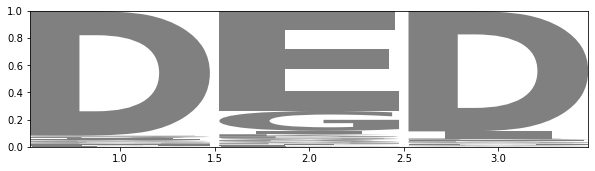

In [207]:
p100_seqlogo_raw_df = pd.DataFrame(seq_logo_list_alltnpBs)
p100_resid_1_freq_df = pd.DataFrame(pd.get_dummies(p100_seqlogo_raw_df.iloc[:, 0]).mean())
p100_resid_2_freq_df = pd.DataFrame(pd.get_dummies(p100_seqlogo_raw_df.iloc[:, 1]).mean())#.rename(columns={'0':'1'})
p100_resid_3_freq_df = pd.DataFrame(pd.get_dummies(p100_seqlogo_raw_df.iloc[:, 2]).mean())#.rename(columns={'0':'1'})
p100_seqlogo_freq_df = pd.concat([p100_resid_1_freq_df, p100_resid_2_freq_df, p100_resid_3_freq_df], axis = 1).fillna(0)
p100_seqlogo_freq_df.columns = [1, 2, 3]
p100_seqlogo_freq_df = p100_seqlogo_freq_df.transpose()
# p100_resid_1_freq_df.iloc[:,0].sort_values(ascending=False), \
# p100_resid_2_freq_df.iloc[:,0].sort_values(ascending=False), \
# p100_resid_3_freq_df.iloc[:,0].sort_values(ascending=False)
crp_logo = logomaker.Logo(p100_seqlogo_freq_df)
crp_logo

Text(0, 0.5, 'frequency')

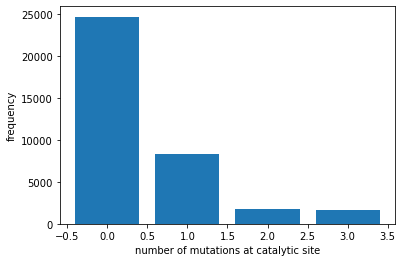

In [201]:
plt.bar([0, 1, 2, 3], [count_0, count_1, count_2, count_3])
plt.xlabel("number of mutations at catalytic site")
plt.ylabel("frequency")

In [101]:
# p30_inactive_list = []
# with open(outfile_tnpBs_inactive) as handle:
#     for rec in SeqIO.parse(handle, 'fasta'):
#         p30_inactive = get_permissive_rep(rec.id)
#         p30_inactive_list.append(p30_inactive)
# p30_inactive_list.sort()
# set(p30_inactive_list)